In [ ]:
import torch
from torch import nn
from tqdm import tqdm

from lib.utils import *
from lib.models import *

from sklearn.metrics import f1_score,recall_score,precision_score

window_size = 101
device = 'cuda'
f1i = []
recalli = []
precisioni = []
model_name = 'fcn'
for i in range(5):
    model = FCN()
    model.load_state_dict(torch.load(f=f'../projects/{model_name}_cv_{i}/best_model.pt',map_location='cuda:0'))
    # trainloader,devloader,test_idx = load_data_cv(foldi=i)
    trainloader,devloader,test_idx = load_data_convolution_cv(foldi=i)
    model.to(device)
    criterion = nn.BCEWithLogitsLoss()
    test_evaluation(trainloader,model,criterion,dir=f'.',filename=f'{model_name}_cv_{i}_train.jpg',device=device)
    test_evaluation(devloader,model,criterion,dir=f'.',filename=f'{model_name}_cv_{i}_dev.jpg',device=device)
    X,y = load_and_window_nursing_list_for_convolution(test_idx)
    # X,y = load_and_window_nursing_list(test_idx)
    loss,y_true,y_pred = test_evaluation(DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True),model,criterion,plot=True,filename=f'{model_name}_cv_{i}')
    f1i.append(f1_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
    recalli.append(recall_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
    precisioni.append(precision_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
    f1i = []
    recalli = []
    precisioni = []
    for idx in test_idx:
        X,y = load_and_window_nursing_list_for_convolution([idx])
        loss,y_true,y_pred = test_evaluation(DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True),model,criterion,plot=True)
        f1i.append(f1_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
        recalli.append(recall_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))
        precisioni.append(precision_score(y_true=y_true,y_pred=y_pred.round(),average='macro'))

In [ ]:
plt.figure(figsize=(7.2,4.45),dpi=200)
sns.kdeplot(recalli,bw_adjust=.4,color='red',label='recall')
sns.rugplot(recalli,color='red',linewidth=1.618)
print(torch.tensor(recalli).mean()) #.4958
print(torch.tensor(recalli).std()) #.0063
sns.kdeplot(f1i,bw_adjust=.4,color='green',label='f1')
sns.rugplot(f1i,color='green',linewidth=1.618)
print(torch.tensor(f1i).mean()) #.4958
print(torch.tensor(f1i).std()) #.0063
sns.kdeplot(precisioni,bw_adjust=.4,color='blue',label='precision')
sns.rugplot(precisioni,color='blue',linewidth=1.618)
print(torch.tensor(precisioni).mean()) #.4958
print(torch.tensor(precisioni).std()) #.0063

,index,variable,value
0,f1,0,0.786403
1,precision,0,0.812388
2,recall,0,0.764748
3,f1,1,0.755663
4,precision,1,0.768420
5,recall,1,0.744196
6,f1,2,0.694659
7,precision,2,0.751173
8,recall,2,0.660706
9,f1,3,0.754147


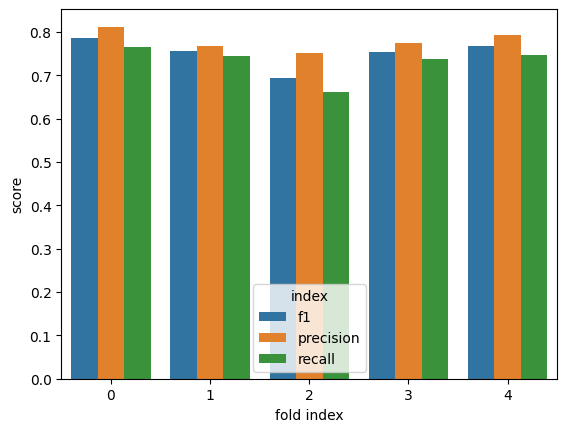

In [56]:
df = pd.DataFrame([f1i,precisioni,recalli],index=['f1','precision','recall'])
df_melted = df.reset_index().melt(id_vars=['index'])
sns.barplot(data=df_melted,x='variable',y='value',hue='index')
plt.xlabel('fold index')
plt.ylabel('score')
df_melted

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score


100%|██████████| 1010/1010 [00:00<00:00, 1041.37it/s]


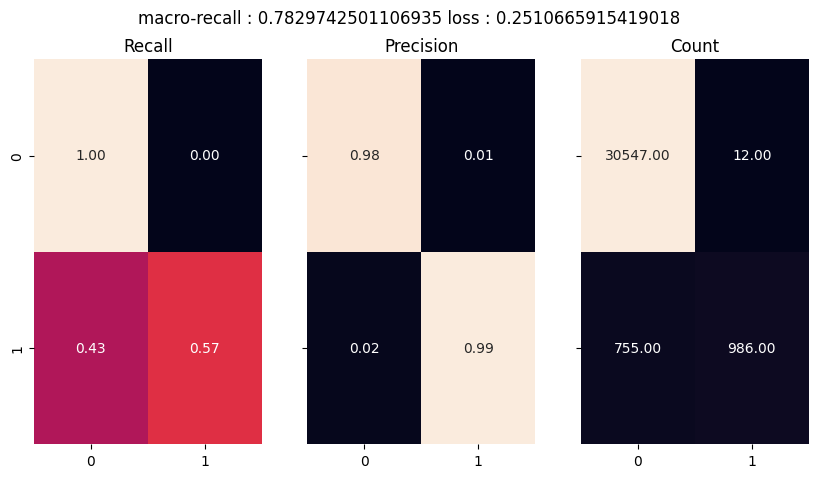

In [57]:
idx = test_idx[0]
import plotly.express as px
holdoutloader = DataLoader(TensorDataset(*load_and_window_nursing_list_for_convolution([idx])),batch_size=32,shuffle=False)
loss,y_true,y_pred = test_evaluation(holdoutloader,model,criterion)
X,y = load_nursing_by_index(idx)
df = pd.DataFrame(X.numpy())
df['y_pred'] = torch.cat([torch.zeros(window_size//2),y_pred.flatten().round(),torch.zeros(window_size//2)])*10
df['y_true'] = y*10
fig = px.line(df)
fig.show(renderer='browser')